In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

df = pd.read_csv('data/matches.csv')

In [2]:
def player_rating(player):
    player_df = df[(df['w1'] == player) | (df['w2'] == player) | (df['w3'] == player) | (df['w4'] == player) | 
            (df['l1'] == player) | (df['l2'] == player) | (df['l3'] == player) | (df['l4'] == player)].copy()
    def player_rating(row, player):
        if row['w1'] == player:
            return row['w1_nr']
        if row['w2'] == player:
            return row['w2_nr']
        if row['w3'] == player:
            return row['w3_nr']
        if row['w4'] == player:
            return row['w4_nr']
        if row['l1'] == player:
            return row['l1_nr']
        if row['l2'] == player:
            return row['l2_nr']
        if row['l3'] == player:
            return row['l3_nr']
        if row['l4'] == player:
            return row['l4_nr']
    player_df['player_rating'] = player_df.apply(player_rating, player=player, axis=1)
    return player_df.sort_values(by='date')


In [3]:
player = 'Thiru'
player_df = player_rating(player)

In [4]:
date_skeleton = pd.DataFrame(pd.date_range(min(player_df['date']), max(player_df['date']), freq='d'), columns=['date'])

In [5]:
date_skeleton['date'] = date_skeleton['date'].astype('str')

In [6]:
date_skeleton.merge(player_df, on='date', how='left').tail(20)

,date,match_id,year_month,map,w1,w2,w3,w4,l1,l2,...,l1_or,l2_or,l3_or,l4_or,l1_nr,l2_nr,l3_nr,l4_nr,map_only,player_rating
953,2023-11-10,778094.0,2023-11,Nomad (Random civs),Water,MrWrong,wArDaDdY,Afterlife,Valar,Thiru,...,1699.0,1692.0,1110.0,848.0,1680.0,1673.0,1091.0,829.0,Nomad,1673.0
954,2023-11-11,779355.0,2023-11,Oasis (Random civs),Water,Lathkore,SuLTaN,newisyou,Valar,Thiru,...,1706.0,1653.0,1376.0,673.0,1687.0,1634.0,1357.0,654.0,Oasis,1634.0
955,2023-11-11,779244.0,2023-11,Arena (Random civs),addu,Lathkore,KhalDrogo,newisyou,Valar,Thiru,...,1753.0,1700.0,1373.0,1363.0,1731.0,1678.0,1351.0,1341.0,Arena,1678.0
956,2023-11-11,779129.0,2023-11,Runestones (Random civs),Water,Thiru,Sephiroth,Afterlife,HELLRAZER,ForeRuthless,...,2722.0,1290.0,1218.0,702.0,2695.0,1263.0,1191.0,675.0,Runestones,1700.0
957,2023-11-11,779301.0,2023-11,Land Nomad (Random civs),Water,MrWrong,Saracen,newisyou,Valar,Thiru,...,1731.0,1678.0,1327.0,698.0,1706.0,1653.0,1302.0,673.0,Land Nomad,1653.0
958,2023-11-12,780059.0,2023-11,Team Islands,Valar,Avenger,MODI,CHARITH,Thiru,Sephiroth,...,1652.0,1332.0,1208.0,693.0,1630.0,1310.0,1186.0,671.0,Team Islands,1630.0
959,2023-11-12,780083.0,2023-11,Migration (Random civs),Water,Sephiroth,wArDaDdY,Avenger,Valar,Thiru,...,1736.0,1630.0,1056.0,1055.0,1718.0,1612.0,1038.0,1037.0,Migration,1612.0
960,2023-11-12,780125.0,2023-11,Hideout (Random civs),dragonstar1233,Valar,wArDaDdY,CHARITH,addu,Water,...,2699.0,1926.0,1612.0,1137.0,2678.0,1905.0,1591.0,1116.0,Hideout,1591.0
961,2023-11-12,780167.0,2023-11,Socotra,dragonstar1233,KhalDrogo,TheLivi,wArDaDdY,Water,Valar,...,1905.0,1739.0,1630.0,1591.0,1900.0,1734.0,1625.0,1586.0,Socotra,1586.0
962,2023-11-12,780212.0,2023-11,Ghost Lake,dragonstar1233,Thiru,wArDaDdY,newisyou,addu,Water,...,2633.0,1900.0,1734.0,614.0,2620.0,1887.0,1721.0,601.0,Ghost Lake,1599.0


In [7]:
plot_df = date_skeleton.merge(player_df, on='date', how='left')

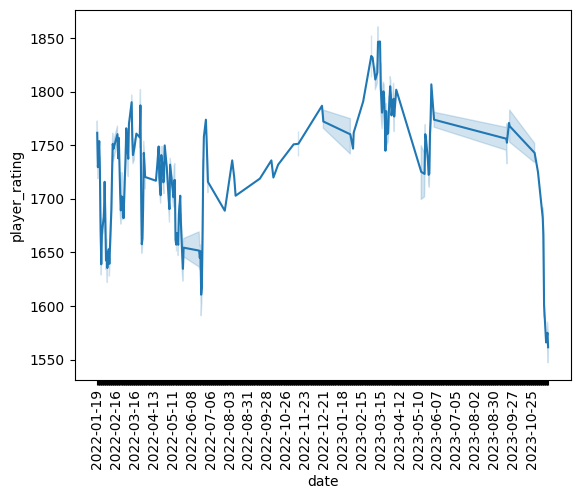

In [8]:
plot = sns.lineplot(data=plot_df, x='date', y='player_rating')
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 28 == 0:  # every Nth label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=90);

In [9]:
def avg_rating(player):
    player_df = df[(df['w1'] == player) | (df['w2'] == player) | (df['w3'] == player) | (df['w4'] == player) | 
            (df['l1'] == player) | (df['l2'] == player) | (df['l3'] == player) | (df['l4'] == player)]
    player_df = player_df[player_df['date'] >= '2023-10-01']
    
    def get_player_rating(row, player):
        if row['w1'] == player:
            return row['w1_nr']
        if row['w2'] == player:
            return row['w2_nr']
        if row['w3'] == player:
            return row['w3_nr']
        if row['w4'] == player:
            return row['w4_nr']
        if row['l1'] == player:
            return row['l1_nr']
        if row['l2'] == player:
            return row['l2_nr']
        if row['l3'] == player:
            return row['l3_nr']
        if row['l4'] == player:
            return row['l4_nr']
    return round(player_df.apply(get_player_rating, player=player, axis=1).mean(), 1)
 

In [10]:
avg_rating('AgentP')

1958.7